In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('csv\\heart.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [57]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [58]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [59]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [60]:
input_cols = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope',]
target_col = 'target'
numeric_cols = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope',]

In [61]:
train_inputs = df[input_cols].copy()
train_targets = df[target_col].copy()

In [62]:
train_inputs

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2
1186,68,1,4,144,193,1,0,141,0,3.4,2
1187,57,1,4,130,131,0,0,115,1,1.2,2
1188,57,0,2,130,236,0,2,174,0,0.0,2


In [63]:
train_targets

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
train_inputs

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.0,0.788732,0.0,0.295455,0.333333
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.0,0.676056,0.0,0.409091,0.666667
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,0.5,0.267606,0.0,0.295455,0.333333
3,0.408163,0.0,1.000000,0.69,0.354892,0.0,0.0,0.338028,1.0,0.465909,0.666667
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.0,0.436620,0.0,0.295455,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
1185,0.346939,1.0,0.000000,0.55,0.437811,0.0,0.0,0.507042,0.0,0.431818,0.666667
1186,0.816327,1.0,1.000000,0.72,0.320066,1.0,0.0,0.570423,0.0,0.681818,0.666667
1187,0.591837,1.0,1.000000,0.65,0.217247,0.0,0.0,0.387324,1.0,0.431818,0.666667
1188,0.591837,0.0,0.333333,0.65,0.391376,0.0,1.0,0.802817,0.0,0.295455,0.666667


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_val, train_targets, val_targets = train_test_split(train_inputs, train_targets, test_size=0.35  ,random_state=42)

In [66]:
X_train

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
29,0.469388,1.0,0.333333,0.625,0.311774,0.0,0.0,0.598592,0.0,0.295455,0.333333
423,0.755102,1.0,1.000000,0.750,0.391376,1.0,0.5,0.316901,1.0,0.295455,0.666667
165,0.489796,0.0,0.333333,0.700,0.373134,0.0,0.0,0.563380,0.0,0.295455,0.333333
248,0.408163,1.0,1.000000,0.610,0.456053,1.0,0.5,0.633803,1.0,0.522727,1.000000
307,0.551020,1.0,1.000000,0.575,0.000000,1.0,0.0,0.669014,0.0,0.306818,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
1044,0.612245,1.0,1.000000,0.625,0.497512,0.0,1.0,0.781690,0.0,0.295455,0.333333
1095,0.551020,1.0,0.333333,0.650,0.434494,0.0,0.0,0.669014,0.0,0.295455,0.333333
1130,0.673469,1.0,0.000000,0.670,0.388060,0.0,0.0,0.598592,0.0,0.590909,0.666667
860,0.693878,0.0,1.000000,0.700,0.444444,0.0,1.0,0.704225,0.0,0.704545,1.000000


In [67]:
train_targets

29      0
423     1
165     0
248     1
307     1
       ..
1044    1
1095    0
1130    1
860     1
1126    0
Name: target, Length: 773, dtype: int64

In [68]:
X_val

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
390,0.673469,1.0,1.000000,0.800,0.000000,1.0,0.5,0.598592,0.0,0.409091,0.666667
247,0.530612,1.0,0.666667,0.600,0.393035,0.0,0.0,0.633803,1.0,0.465909,0.666667
260,0.551020,0.0,0.333333,0.610,0.530680,0.0,0.0,0.669014,0.0,0.295455,0.333333
155,0.571429,1.0,1.000000,0.775,0.567164,1.0,0.0,0.633803,1.0,0.636364,0.666667
984,0.653061,0.0,1.000000,0.750,0.427861,0.0,1.0,0.683099,0.0,0.590909,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
682,0.591837,1.0,1.000000,0.750,0.457711,0.0,1.0,0.366197,1.0,0.363636,0.666667
80,0.551020,1.0,0.666667,0.550,0.459370,0.0,0.0,0.704225,0.0,0.295455,0.333333
997,0.673469,0.0,1.000000,0.725,0.509121,0.0,1.0,0.605634,1.0,0.409091,0.666667
987,0.346939,1.0,1.000000,0.575,0.431177,0.0,1.0,0.880282,0.0,0.295455,0.333333


In [69]:
val_targets

390     1
247     1
260     0
155     1
984     1
       ..
682     1
80      0
997     1
987     0
1063    0
Name: target, Length: 417, dtype: int64

## Logistic regression

In [70]:
lr = LogisticRegression()
lr.fit(X_train,train_targets)
lr.score(X_val,val_targets)

0.8489208633093526

## DECISION TREE

In [71]:
dt = DecisionTreeClassifier()
dt.fit(X_train,train_targets)
dt.score(X_val,val_targets)

0.8561151079136691

## RANDOM FOREST

In [72]:
rf = RandomForestClassifier()
rf.fit(X_train,train_targets)
rf.score(X_val,val_targets)

0.9112709832134293

In [73]:
def get_score(model, X_train, X_val, train_targets, val_targets):
    model.fit(X_train, train_targets)
    return model.score(X_val, val_targets)

## Hyperparameter Tuning using Bayesian Optimization

Bayesian optimization uses probability to find the minimum of a function. The final aim is to find the input value to a function which can gives us the lowest possible output value.It usually performs better than random,grid and manual search providing better performance in the testing phase and reduced optimization time.
In Hyperopt, Bayesian Optimization can be implemented giving 3 three main parameters to the function fmin.

- Objective Function = defines the loss function to minimize.
- Domain Space = defines the range of input values to test (in Bayesian Optimization this space creates a probability distribution for each of the used Hyperparameters).
- Optimization Algorithm = defines the search algorithm to use to select the best input values to use in each new iteration.

## OPTIMIZATION USING SKOPT

In [74]:
from skopt import gp_minimize
from skopt import space
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [75]:
def optimize(params,param_names):
    params = dict(zip(param_names,params))
    model = RandomForestClassifier(**params)
    return -np.mean(cross_val_score(model, X_train, train_targets, cv=5, n_jobs=-1,))

In [76]:
from functools import partial
params = {
    'n_estimators':[100,120,130,140,150],
    'max_depth':[6,8,10],
    'criterion':['gini','entropy','log_loss'],
    'min_samples_split' : [0.5,1,2,3],
    'max_features' : ['sqrt', 'log2']
}
param_names =[
    'max_depth',
    'n_estimators',
    'criterion',
    'max_features',
    'min_samples_split',
    'max_leaf_nodes',
]
param_space = [
    space.Integer(8,10, name= 'max_depth'),
    space.Integer(100,140,name='n_estimators'),
    space.Categorical(['gini','entropy'],name='criterion'),
    space.Categorical(['sqrt'],name='max_features'),
    space.Integer(120,130,name='max_leaf_nodes'),
]
optimization_function = partial(optimize,param_names=param_names)

In [77]:
from skopt import gp_minimize
res_gp = gp_minimize(
            optimization_function, 
            dimensions=param_space,
            n_calls=15,n_random_starts=10,
            random_state=43,verbose=10
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 3.5250
Function value obtained: -0.8291
Current minimum: -0.8291
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.3341
Function value obtained: -0.8253
Current minimum: -0.8291
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.3069
Function value obtained: -0.8279
Current minimum: -0.8291
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 1.0720
Function value obtained: -0.8330
Current minimum: -0.8330
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.1998
Function value obtained: -0.8253
Current minimum: -0.8330
Iteration No: 6 started. 

In [78]:
res_gp.fun

-0.8356263091746963

In [79]:
res_gp.x

[8, 119, 'entropy', 'sqrt', 129]

In [80]:
dict(zip(param_names,res_gp.x))

{'max_depth': 8,
 'n_estimators': 119,
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_split': 129}

<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

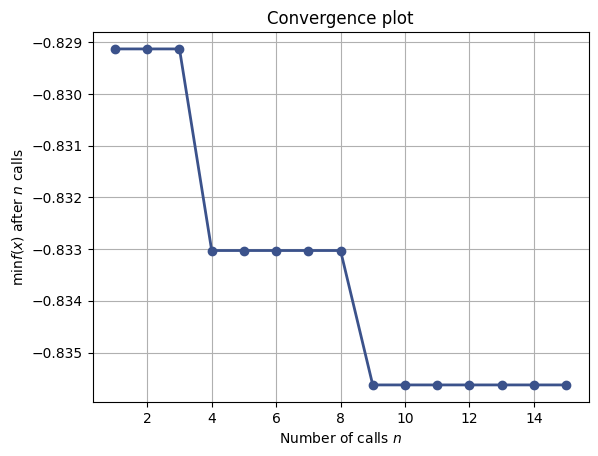

In [81]:
from skopt.plots import plot_convergence
plot_convergence(res_gp)

In [82]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [83]:
best_params_rf = {  'random_state' : 43,
                  'n_jobs': -1,
                    'max_depth': 10,
                    'n_estimators': 121,
                    'criterion': 'gini',
                    'max_features': 'sqrt',
                    'min_samples_split': 123
}

def evalmodel(model,**params):
    best_model = model(**params).fit(X_train,train_targets)
    train_preds = best_model.predict(X_train)
    val_preds = best_model.predict(X_val)
    return {
        'train_score': f'{round(accuracy_score(train_preds,train_targets)*100,2)}%',
        'val_score' : f'{round(accuracy_score(val_preds,val_targets)*100,2)}%' ,
        'Confusion Matrix': confusion_matrix(val_preds,val_targets),
    }
evalmodel(RandomForestClassifier,**best_params_rf)

{'train_score': '84.48%',
 'val_score': '86.81%',
 'Confusion Matrix': array([[154,  26],
        [ 29, 208]], dtype=int64)}

## HYPEROPT

In [84]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

In [85]:
params = {
    'n_estimators':[100,120,130,140,150],
    'max_depth':[6,8,10],
    'criterion':['gini','entropy','log_loss'],
    'min_samples_split' : [0.5,1,2,3],
    'max_features' : ['sqrt', 'log2']
}

The stochastic expressions currently recognized by hyperopt's optimization algorithms are:

## 1.hp.choice(label, options)

Returns one of the options, which should be a list or tuple. The elements of options can themselves be [nested] stochastic expressions. In this case, the stochastic choices that only appear in some of the options become conditional parameters.

## 2.hp.randint(label, upper)

Returns a random integer in the range [0, upper). The semantics of this distribution is that there is no more correlation in the loss function between nearby integer values, as compared with more distant integer values. This is an appropriate distribution for describing random seeds for example. If the loss function is probably more correlated for nearby integer values, then you should probably use one of the "quantized" continuous distributions, such as either quniform, qloguniform, qnormal or qlognormal.

## 3.hp.uniform(label, low, high)

Returns a value uniformly between low and high.
When optimizing, this variable is constrained to a two-sided interval.

## 4.hp.quniform(label, low, high, q)

Returns a value like round(uniform(low, high) / q) * q
Suitable for a discrete value with respect to which the objective is still somewhat "smooth", but which should be bounded both above and below.

## 5.hp.loguniform(label, low, high)

Returns a value drawn according to exp(uniform(low, high)) so that the logarithm of the return value is uniformly distributed.
When optimizing, this variable is constrained to the interval [exp(low), exp(high)].

## 6.hp.qloguniform(label, low, high, q)

Returns a value like round(exp(uniform(low, high)) / q) * q
Suitable for a discrete variable with respect to which the objective is "smooth" and gets smoother with the size of the value, but which should be bounded both above and below.

## 7.hp.normal(label, mu, sigma)

Returns a real value that's normally-distributed with mean mu and standard deviation sigma. When optimizing, this is an unconstrained variable.

## 8.hp.qnormal(label, mu, sigma, q)

Returns a value like round(normal(mu, sigma) / q) * q
Suitable for a discrete variable that probably takes a value around mu, but is fundamentally unbounded.

## 9.hp.lognormal(label, mu, sigma)

Returns a value drawn according to exp(normal(mu, sigma)) so that the logarithm of the return value is normally distributed. When optimizing, this variable is constrained to be positive.

## 10.hp.qlognormal(label, mu, sigma, q)

Returns a value like round(exp(normal(mu, sigma)) / q) * q
Suitable for a discrete variable with respect to which the objective is smooth and gets smoother with the size of the variable, which is bounded from one side.

In [86]:
space ={
    'n_estimators' : hp.choice('n_estimator',[100,110,120,130,140,150,160]),
    'max_depth': hp.choice('max_depth', [2,4,6,8,10,12]),
    'criterion': hp.choice('criterion', ['entropy', 'gini','log_loss']),
    'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
    # 'max_features': hp.choice('max_features', ['auto', 'sqrt','log2']),
}

def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                #  max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train,train_targets, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [87]:
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 250,
            trials= trials)
best

100%|██████████| 250/250 [02:35<00:00,  1.61trial/s, best loss: -0.8873732718894007]


{'criterion': 0,
 'max_depth': 4,
 'min_samples_leaf': 9.700681649829927e-05,
 'min_samples_split': 0.0033299324681779906,
 'n_estimator': 5}

In [103]:
best_params_rf = {
    'n_jobs' : -1,
    'random_state' : 43,
    'criterion': 'entropy',
    'max_depth': 20,
    'min_samples_leaf':  9.700681649829927e-05,
    'min_samples_split': 0.0033299324681779906,
    'n_estimators': 150,
    'max_features' : 'sqrt'
}

evalmodel(RandomForestClassifier,**best_params_rf)

{'train_score': '100.0%',
 'val_score': '93.76%',
 'Confusion Matrix': array([[167,  10],
        [ 16, 224]], dtype=int64)}